In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from collections import Counter
%matplotlib inline

In [40]:
df = pd.read_csv(r'C:\Users\pc\Downloads\Projects\valorant stats\valorant-stats.csv')

In [41]:
df

,Name,Weapon Type,Price,Fire Rate,Wall Penetration,Magazine Capacity,HDMG_0,BDMG_0,LDMG_0,HDMG_1,BDMG_1,LDMG_1,HDMG_2,BDMG_2,LDMG_2
0,Classic,Sidearm,0,6.75,Low,12,78,26,22,78,26,22,66,22,18
1,Shorty,Sidearm,200,3.30,Low,2,36,12,10,24,8,6,9,3,2
2,Frenzy,Sidearm,400,10.00,Low,13,78,26,22,63,21,17,63,21,17
3,Ghost,Sidearm,500,6.75,Medium,15,105,33,26,88,25,21,88,25,21
4,Sheriff,Sidearm,800,4.00,High,6,160,55,47,160,55,47,145,50,43
5,Stinger,SMG,1000,18.00,Low,20,67,27,23,62,25,21,62,25,21
6,Spectre,SMG,1600,13.33,Medium,30,78,26,22,66,22,18,66,22,18
7,Bulldog,Rifle,2100,9.15,Medium,24,116,35,30,116,35,30,116,35,30
8,Guardian,Rifle,2500,6.50,Medium,12,195,65,49,195,65,49,195,65,49
9,Phantom,Rifle,2900,11.00,Medium,30,156,39,33,140,35,30,124,31,26


<AxesSubplot:xlabel='Fire Rate', ylabel='Name'>

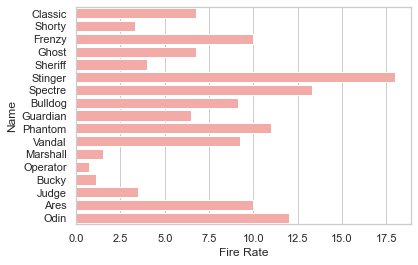

In [42]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="Fire Rate", y="Name", data=df,
            label="Total", color="r")

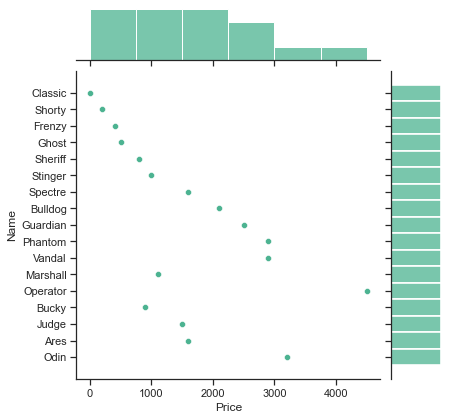

In [43]:
sns.set_theme(style="ticks")
sns.jointplot(data=df,x='Price', y='Name', color="#4CB391")

# Which types of weapons are in the game?


In [44]:
weapon_type = dict(Counter(df['Weapon Type']))
weapon_type = {'Weapon Type': list(weapon_type.keys()), 'count': list(weapon_type.values())}

fig_weapon = px.pie(weapon_type, values = 'count', names = 'Weapon Type', title = 'Weapon Type Distribution', hole = .5, color_discrete_sequence = px.colors.sequential.Agsunset)
fig_weapon.show()

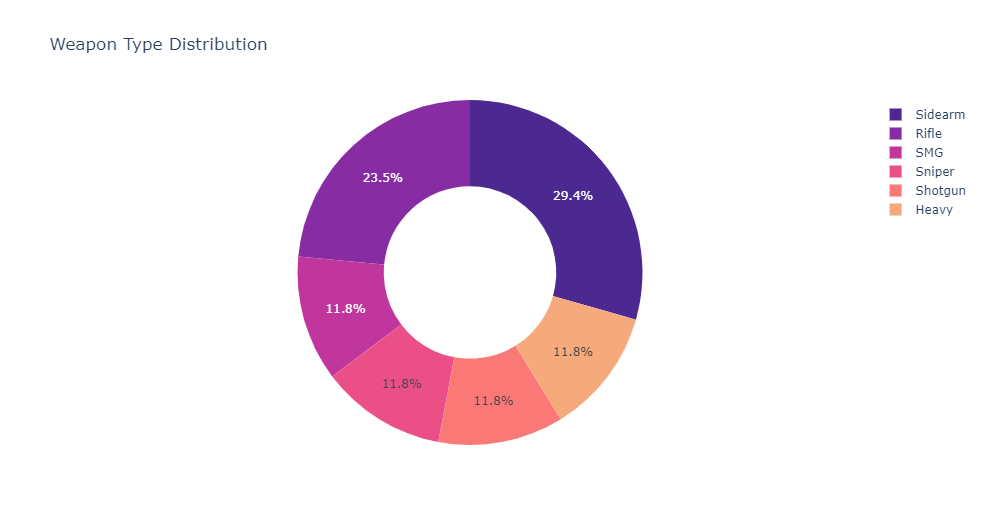

In [46]:
def return_sorted(col_name, asc = False, limit = 5):
    sorted_df = df.sort_values(by=col_name, ascending=asc)
    sorted_df = sorted_df[:limit]

    return {'weapon': sorted_df['Name'].to_list(), 'values': sorted_df[col_name].to_list()}

# Which is the most lethal weapon in the game?

In [53]:
headshot_dict = return_sorted('HDMG_0', limit = 10)

num_ele = len(headshot_dict['weapon'])
colors = ['#22a6b3',] * num_ele
colors[0] = '#eb4d4b'

fig_headshot = go.Figure(data=[go.Bar(
    x=headshot_dict['weapon'],
    y=headshot_dict['values'],
    marker_color = colors
)])

fig_headshot.update_traces(texttemplate='%{y:}', textposition='outside')

fig_headshot.update_layout(
    title = 'Damage given by a headshot',
    yaxis=dict(
        title='Damage',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=800,
    height=800
)

fig_headshot.show()

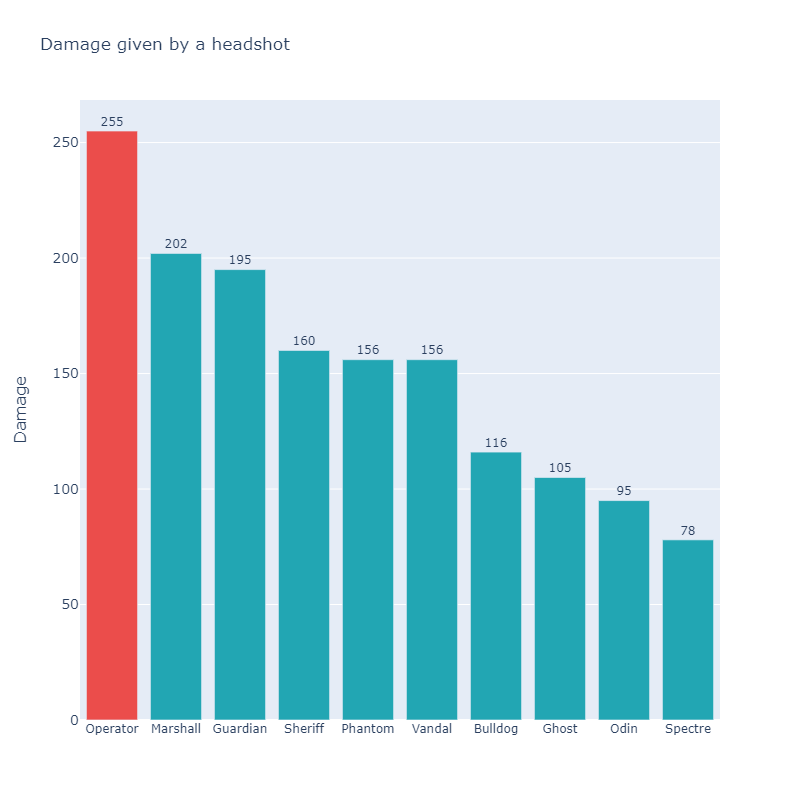

# Which weapon has the most capacity?

In [50]:
mag_dict = return_sorted('Magazine Capacity', limit = 10)

num_ele = len(mag_dict['weapon'])
colors = ['green',] * num_ele

fig_mag = go.Figure(data=[go.Bar(
    x=mag_dict['weapon'],
    y=mag_dict['values'],
    marker_color = colors
)])

fig_mag.update_traces(texttemplate='%{y:}', textposition='outside')

fig_mag.update_layout(
    yaxis=dict(
        title='Magazine Capacity',
        titlefont_size=16,
        tickfont_size=14,
    ),
    width=800,
    height=800
)

fig_mag.show()


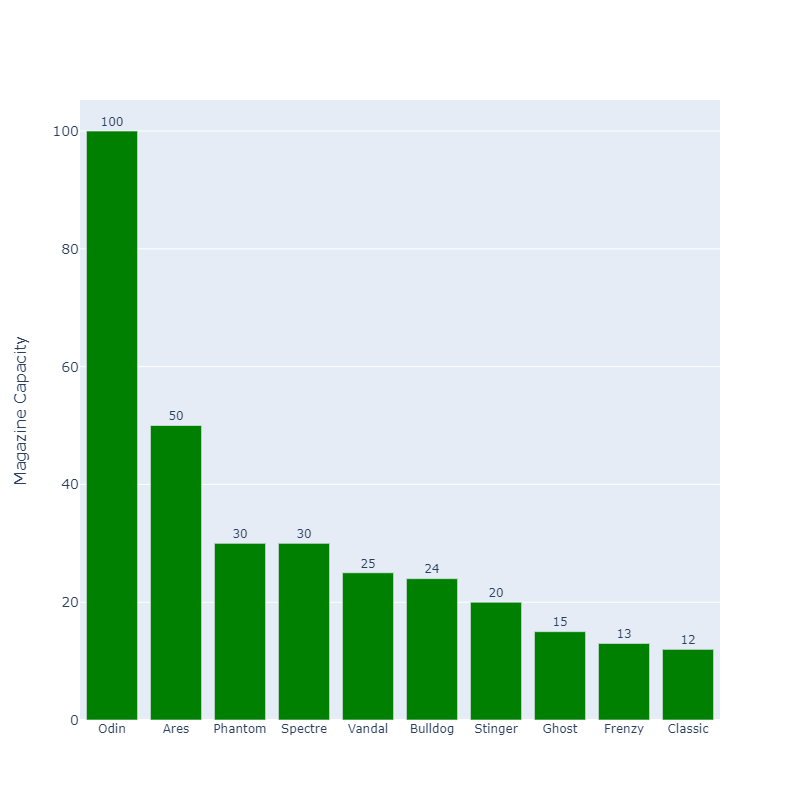

# How much penetration do the game's weapons have?

In [51]:
pen_type = dict(Counter(df['Wall Penetration']))
pen_type = {'Penetration': list(pen_type.keys()), 'count': list(pen_type.values())}

colors_pie = ['#fed330', '#20bf6b', '#eb3b5a']

fig_pen = px.pie(pen_type, values = 'count', names = 'Penetration', title = 'Penetration Distribution', hole = .5, color_discrete_sequence = colors_pie)
fig_pen.show()

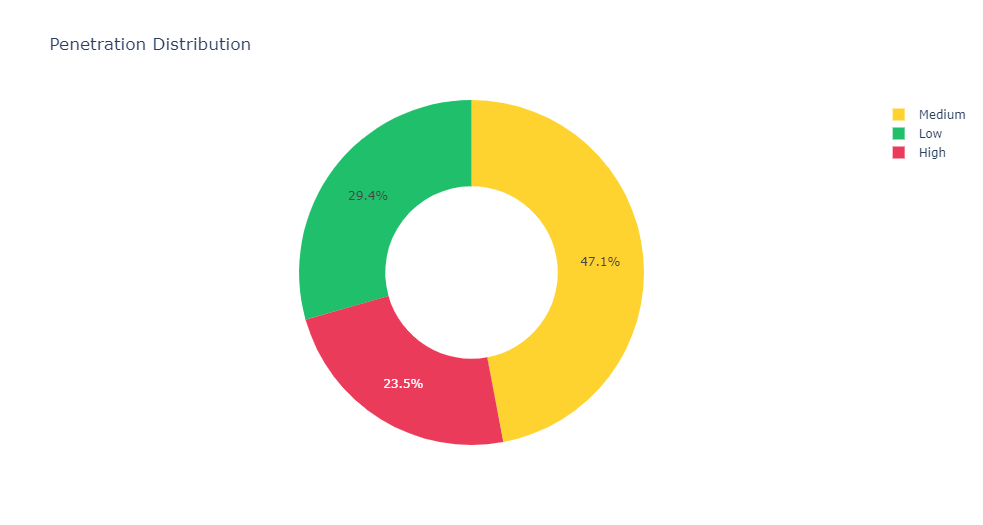